In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams["figure.figsize"]=(20,10)

In [2]:
df = pd.read_csv("dataset_house/Bengaluru_House_Data.csv")
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
df.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [4]:
cols = ['area_type','society','balcony','availability']
df2=df.drop(cols,axis='columns')
df2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [5]:
df2.isna().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [6]:
df3 = df2.dropna()
df3.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [7]:
df3.isna().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [8]:
df3['bhk'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))
df3.head()

C:\Users\Muskan\AppData\Local\Temp\ipykernel_13704\3620022870.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['bhk'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))


,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [9]:
df3.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      shape=(2067,), dtype=object)

In [10]:
def isfloat(x):
    try:
        float(x)
    except:
        return False
    return True

In [11]:
df3[~df3['total_sqft'].apply(isfloat)].head(10)

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


In [12]:
def convert_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [13]:
df4 = df3.copy()
df4['toatl_sqft']=df4['total_sqft'].apply(convert_num)
df4.head()

,location,size,total_sqft,bath,price,bhk,toatl_sqft
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2,1056.0
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4,2600.0
2,Uttarahalli,3 BHK,1440,2.0,62.00,3,1440.0
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3,1521.0
4,Kothanur,2 BHK,1200,2.0,51.00,2,1200.0


In [14]:
df4.loc[30]

location        Yelahanka
size                4 BHK
total_sqft    2100 - 2850
bath                  4.0
price               186.0
bhk                     4
toatl_sqft         2475.0
Name: 30, dtype: object

In [15]:
convert_num('2100 - 2850')

2475.0

In [16]:
df4['toatl_sqft']=df4['total_sqft'].apply(convert_num)
df4.loc[30]

location        Yelahanka
size                4 BHK
total_sqft    2100 - 2850
bath                  4.0
price               186.0
bhk                     4
toatl_sqft         2475.0
Name: 30, dtype: object

In [17]:
def convert_sqft(x):
    try:
        # Case 1: Range "1200-1500"
        if '-' in x:
            tokens = [t.strip() for t in x.split('-')]
            return (float(tokens[0]) + float(tokens[1])) / 2

        # Case 2: If pure number
        return float(x)

    except:
        x = x.lower()

        # Case 3: Square Meters
        if "meter" in x:
            return float(x.split()[0]) * 10.7639

        # Case 4: Acres
        if "acre" in x:
            return float(x.split()[0]) * 43560

        # Case 5: Guntha
        if "guntha" in x:
            return float(x.split()[0]) * 1089

        # Case 6: Square Yards
        if "yard" in x:
            return float(x.split()[0]) * 9

        # If nothing works
        return None


In [18]:
df4.loc[30]

location        Yelahanka
size                4 BHK
total_sqft    2100 - 2850
bath                  4.0
price               186.0
bhk                     4
toatl_sqft         2475.0
Name: 30, dtype: object

In [19]:
import re

def convert_sqft(x):
    try:
        # Case 1: Range "1200-1500"
        if '-' in x:
            tokens = [t.strip() for t in x.split('-')]
            return (float(tokens[0]) + float(tokens[1])) / 2

        # Case 2: Pure number
        return float(x)

    except:
        x = str(x).lower().strip()

        # Extract numeric value (first number in string)
        num_match = re.findall(r"[\d\.]+", x)
        if not num_match:
            return None
        num = float(num_match[0])

        # Case 3: Square Meters
        if "meter" in x:
            return num * 10.7639

        # Case 4: Acres
        if "acre" in x:
            return num * 43560

        # Case 5: Guntha
        if "guntha" in x:
            return num * 1089

        # Case 6: Square Yards
        if "yard" in x:
            return num * 9

        # If no recognizable unit → assume sqft
        return num


In [20]:
df4['total_sqft']=df4['total_sqft'].apply(convert_sqft)
df4.loc[30]

location      Yelahanka
size              4 BHK
total_sqft       2475.0
bath                4.0
price             186.0
bhk                   4
toatl_sqft       2475.0
Name: 30, dtype: object

In [21]:

df4.head()

,location,size,total_sqft,bath,price,bhk,toatl_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,1056.0
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,2600.0
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,1440.0
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,1521.0
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,1200.0


In [22]:
df4.drop(['toatl_sqft','total_sqft_clean'],axis=1,inplace=True)
df4.head(20)

KeyError: "['total_sqft_clean'] not found in axis"

In [23]:
df4.head()

,location,size,total_sqft,bath,price,bhk,toatl_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,1056.0
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,2600.0
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,1440.0
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,1521.0
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,1200.0


In [24]:
df4.drop(['toatl_sqft'],axis=1,inplace=True)
df4.head(20)

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2
5,Whitefield,2 BHK,1170.0,2.0,38.00,2
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3
9,Gandhi Bazar,6 Bedroom,1020.0,6.0,370.00,6


In [25]:
df5 = df4.copy()
df5['price_per_sqft'] = df5['price']*100000/df5['total_sqft']
df5.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [26]:
len(df5['location'].unique())

1304

In [27]:
df5.location = df5.location.apply(lambda x:x.strip())
location_stats = df5.groupby('location')['location'].agg('count').sort_values(ascending = False)
location_stats

location
Whitefield                            535
Sarjapur  Road                        392
Electronic City                       304
Kanakpura Road                        266
Thanisandra                           236
                                     ... 
poornaprajna layout                     1
pavitra paradise                        1
near Ramanashree California resort      1
mvj engineering college                 1
1Kasavanhalli                           1
Name: location, Length: 1293, dtype: int64

In [28]:
len(location_stats[location_stats<=10])

1052

In [29]:
location_less_than_10=location_stats[location_stats<=10]
location_less_than_10

location
Kalkere                               10
Sadashiva Nagar                       10
BTM 1st Stage                         10
Basapura                              10
Gunjur Palya                          10
                                      ..
poornaprajna layout                    1
pavitra paradise                       1
near Ramanashree California resort     1
mvj engineering college                1
1Kasavanhalli                          1
Name: location, Length: 1052, dtype: int64

In [30]:
len(df5.location.unique())

1293

In [31]:
df5.location = df5.location.apply(lambda x:'other' if x in location_less_than_10 else x)
len(df5.location.unique())

242

In [32]:
a= df5[df5['location'] == 'other']
a

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.00,6,36274.509804
18,other,3 BHK,2770.0,4.0,290.00,3,10469.314079
19,other,2 BHK,1100.0,2.0,48.00,2,4363.636364
25,other,3 BHK,1250.0,3.0,56.00,3,4480.000000
42,other,1 BHK,600.0,1.0,38.00,1,6333.333333
...,...,...,...,...,...,...,...
13291,other,1 Bedroom,812.0,1.0,26.00,1,3201.970443
13292,other,3 BHK,1440.0,2.0,63.93,3,4439.583333
13302,other,2 BHK,1075.0,2.0,48.00,2,4465.116279
13306,other,4 Bedroom,1200.0,5.0,325.00,4,27083.333333


In [33]:
df5[df5.total_sqft/df5.bhk < 300].head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000


In [34]:
df6 = df5[df5.total_sqft/df5.bhk >= 300]
df6.shape

(12496, 7)

In [35]:
df6.price_per_sqft.describe()

count     12496.000000
mean       6300.254834
std        4168.532876
min           2.257423
25%        4204.932752
50%        5291.005291
75%        6916.749012
max      176470.588235
Name: price_per_sqft, dtype: float64

In [36]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m=np.mean(subdf.price_per_sqft)
        std = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft >(m-std)) & (subdf.price_per_sqft<=(m+std))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out

df7 = remove_pps_outliers(df6)
df7.shape


(10266, 7)

In [37]:
def plot(df,location):
    bhk2 = df[(df.location == location) & (df.bhk==2)]
    bhk3 = df[(df.location == location) & (df.bhk==3)]
    matplotlib.rcPadef remove_bhk_outliers(df):
    exclude_indices = []
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        # calculate mean, std, count for each BHK in this location
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        # check if higher BHK is priced lower than (bhk-1)
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk - 1)
            if stats and stats['count'] > 5:
                exclude_indices.extend(
                    bhk_df[bhk_df.price_per_sqft < stats['mean']].index.values
                )
    return df.drop(exclude_indices, axis='index')

df8 = remove_bhk_outliers(df7)
df8.shape
rams['figure.figsize']=(15,20)
    plt.scatter(bhk2.total_sqft, bhk2.price,color='blue',label='2 bhk',s=50)
    plt.scatter(bhk3.total_sqft, bhk3.price,color='green',label='3 bhk',s=50,marker='+')
    plt.xlabel('Total sq. ft')
    plt.ylabel('Price')
    plt.title('Location')
    plt.legend()
plot(df7, "Hebbal")
               
    
    

SyntaxError: invalid syntax (80466174.py, line 4)

In [38]:
def remove_bhk_outliers(df): 
    exclude_indices=np.array([]) 
    for location,location_df in df.groupby('location'): 
        bhk_stats={} 
        for bhk,bhk_df in location_df.groupby('bhk'): 
            bhk_stats[bhk]={ 'mean' : np.mean(bhk_df.price_per_sqft), 
                             'std': np.std(bhk_df.price_per_sqft),
                             'count' : bhk_df.shape[0] }
        for bhk,bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1) 
            if stats and stats['count']>5:
                exclude_indices=np.append(exclude_indices,bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values) 
    return df.drop(exclude_indices,axis='index')
df8 = remove_bhk_outliers(df7) 
df8.shape

                
            
    

(7342, 7)

In [39]:
plot(df8,"Hebbal")

NameError: name 'plot' is not defined

In [ ]:
#matplotlib.rcParams["figure.figsize"]=(20,10)
plt.hist(df8.price_per_sqft,rwidth=0.6)
plt.xlabel('price per sq. ft')
plt.ylabel("count")

In [40]:
df8.bath.unique()

array([ 4.,  3.,  2.,  5.,  1.,  8.,  6.,  9.,  7., 12., 16., 13.])

In [41]:
df8[df8.bath>10]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
5290,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
8505,other,10 BHK,12000.0,12.0,525.0,10,4375.000000
8594,other,16 BHK,10000.0,16.0,550.0,16,5500.000000
9330,other,11 BHK,6000.0,12.0,150.0,11,2500.000000
9662,other,13 BHK,5425.0,13.0,275.0,13,5069.124424


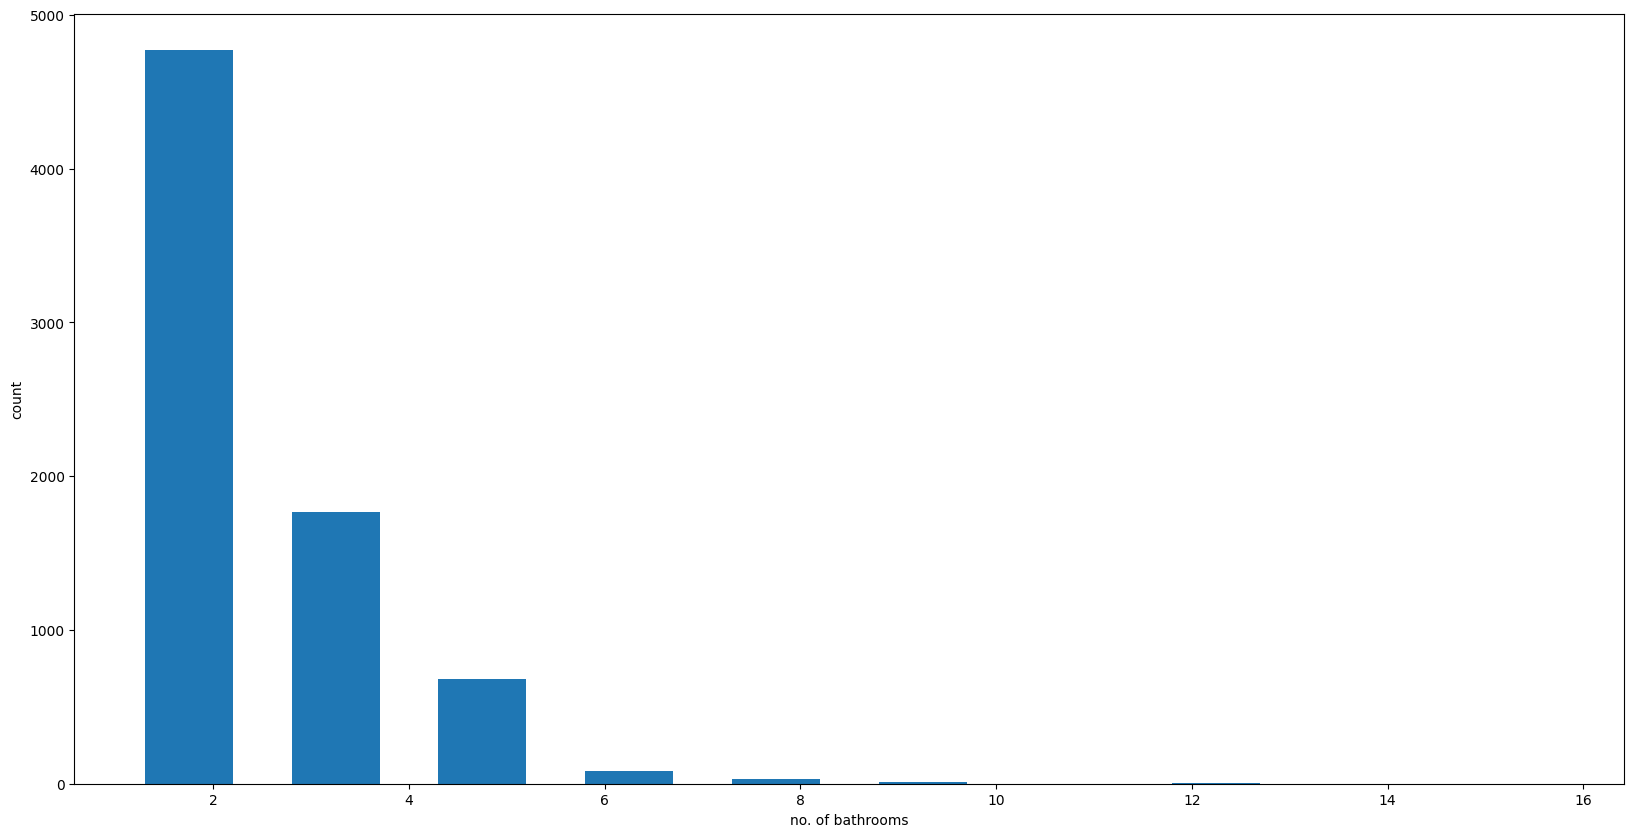

In [42]:
plt.hist(df8.bath,rwidth=0.6)
plt.xlabel("no. of bathrooms")
plt.ylabel("count")
plt.show()

In [43]:
df8[df8.bath>df8.bhk+2]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
1631,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
5251,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
6726,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
8429,other,6 BHK,11338.0,9.0,1000.0,6,8819.897689


In [44]:
df9=df8[df8.bath<=df8.bhk+2]
df9.shape

(7338, 7)

In [45]:
df10=df9.drop(['price_per_sqft','size'],axis=1)
df10.head()

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2


In [48]:
dummies = pd.get_dummies(df10.location,dtype='int')

In [49]:
dummies

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10257,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10258,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10261,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10262,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [52]:
df11 = pd.concat([df10,dummies.drop('other',axis=1)],axis=1)
df11.head()

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1200.0,2.0,130.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1235.0,2.0,148.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [53]:
df12 = df11.drop('location',axis=1) 
df12.head()

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,235.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,130.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,148.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [54]:
X = df12.drop('price',axis=1)
X.head()

,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [55]:
y = df12['price']
y.head()

0    428.0
1    194.0
2    235.0
3    130.0
4    148.0
Name: price, dtype: float64

In [57]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=10)


In [59]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.6431723713708786

In [60]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
cv = ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
cross_val_score(LinearRegression(),X,y,cv=cv)

array([0.6413627 , 0.50947876, 0.59769783, 0.44645657, 0.51517075])

In [63]:
import pandas as pd
from sklearn.model_selection import GridSearchCV, ShuffleSplit
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X, y):
    algos = {
        'linear_regression': {
            'model': LinearRegression(),
            'params': {}   # normalize deprecated
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1, 2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion': ['squared_error', 'absolute_error'],
                'splitter': ['best', 'random']
            }
        }
    }

    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X, y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])
find_best_model_using_gridsearchcv(X,y)

,model,best_score,best_params
0,linear_regression,0.542033,{}
1,lasso,0.366600,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.699307,"{'criterion': 'squared_error', 'splitter': 'be..."


In [64]:
from sklearn.tree import DecisionTreeRegressor
decision_tree_clf = DecisionTreeRegressor(criterion='squared_error', splitter='best')
decision_tree_clf.fit(X, y)



,criterion,'squared_error'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [69]:
def predict_price(location, sqft, bath, bhk):    
    loc_index = np.where(X.columns == location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1

    # convert numpy array into DataFrame with column names
    x_df = pd.DataFrame([x], columns=X.columns)

    return lr_clf.predict(x_df)[0]



In [70]:
predict_price('1st Phase JP Nagar',1000, 2, 2)

np.float64(98.41330482389799)

In [71]:

predict_price('1st Phase JP Nagar',1000, 3, 3)

np.float64(148.010398322556)

In [75]:
predict_price('Indira Nagar',1000, 2, 2)


np.float64(170.11411111001854)

In [76]:
predict_price('Indira Nagar',1000, 3, 3)


np.float64(219.71120460867655)

In [72]:
from sklearn.tree import DecisionTreeRegressor
decision_tree_clf = DecisionTreeRegressor(criterion='squared_error', splitter='best')
decision_tree_clf.fit(X, y)


,criterion,'squared_error'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [73]:
def predict_price_decision_tree(location, sqft, bath, bhk):    
    # find index of the location column
    loc_index = np.where(X.columns == location)[0][0]

    # create an empty row of zeros (same length as X.columns)
    x = np.zeros(len(X.columns))
    x[0] = sqft   # set sqft
    x[1] = bath   # set bath
    x[2] = bhk    # set bhk

    # set location column to 1
    if loc_index >= 0:
        x[loc_index] = 1

    x_df = pd.DataFrame([x], columns=X.columns)

    # use decision tree model instead of linear regression
    return decision_tree_clf.predict(x_df)[0]


In [74]:
predict_price('1st Phase JP Nagar',1000, 3, 3)

np.float64(148.010398322556)

In [77]:
predict_price('Indira Nagar',1000, 3, 3)


np.float64(219.71120460867655)

In [78]:
import pickle
with open('banglore_home_prices_model.pickle','wb') as f:
    pickle.dump(lr_clf,f)

In [79]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))